<h2> Комментарий ревьюера <a class="tocSkip"></h2>

Имран, привет!

Меня зовут Олег, и я буду проверять твой проект. Предлагаю общаться на "ты", но если тебе будет некомфортно, обязательно сообщи, и мы перейдем на "вы". Моя главная цель - не указать на твои ошибки, а поделиться опытом и подготовить тебя к работе аналитиком. Увидев у тебя ошибку, я постараюсь указать на её наличие и дам возможность найти и самостоятельно исправить её.

В проверке проекта я буду использовать разные цвета для обозначения комментариев. Например:

<br/>

<div class="alert alert-success">
<h3> Комментарий ревьюера ✔️<a class="tocSkip"> </h3>

Так выделены удачные решения, на которые можно опираться в будущем.
</div>

<br/>

<div class="alert alert-warning">
    <h3> Комментарий ревьюера ⚠️<a class="tocSkip"> </h3>

Когда решение на отдельном шаге станет лучше, если внести небольшие коррективы.
</div>


<br/>
<div class="alert alert-block alert-danger">
<h3> Комментарий ревьюера ❌<a class="tocSkip"></h3>

 А так выделены решения, которые необходимо доработать, чтобы я мог принять проект.
</div>
    
  
Если вносишь изменения в проект, указывай, пожалуйста, это в своих комментариях. Будет удобно, если обозначишь их заметным цветом. Например, вот так:
       
<div class="alert alert-block alert-info">
    
<h3> Комментарий студента  <a class="tocSkip"></h3>
    
Можешь кликнуть сюда два раза и скопировать код комментария. Также если что-то непонятно или остались вопросы по ревью, обязательно пиши.
    
</div>
    
Пожалуйста, не удаляй и не перемещай мои комментарии, чтобы не произошло путаницы, и я мог быстрее проверить проект.
<br/>

<div class="alert alert-block alert-info">
<h3> Комментарий студента  <a class="tocSkip"></h3>
    
Олег, привет! На "ты" - без проблем.
Спасибо за комментарии к работе, далее по тетрадке мои ответы и исправления.

<div style="border:solid Chocolate 2px; padding: 40px">

**Общий вывод по ревью v2**

Очень качественно выполненный проект! Мне было приятно с тобой работать 🤝

Видно, что ты последовательно и вдумчиво подходишь к анализу.
    
А проект написан аккуратно, поэтому его легко воспринимать.

Продолжай в том же духе и станешь крутым специалистом.

**Проект принимаю. Успехов в дальнейшем обучении!**

# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Вам нужно научиться определять рыночную стоимость объектов недвижимости. Для этого проведите исследовательский анализ данных и установите параметры, влияющие на цену объектов. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта и других объектов — эти данные автоматически получены из геосервисов. Количество парков и водоёмов также заполняется без участия пользователя.

 <div class="alert alert-success">
<h3> Комментарий ревьюера ✔️<a class="tocSkip"> </h3>

 Стоило бы расписать цели и задачи своими словами. Этот навык пригодится тебе в финальном спринте.
</div>

### Откройте файл с данными и изучите общую информацию

#### Открываем файл с данными и выводим информацию о таблице, а также несколько строк

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import numpy as np
import seaborn as sns

In [2]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep = '\t')
data.info()
display(data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


#### Выводим гистограммы для числовых значений датафрейма

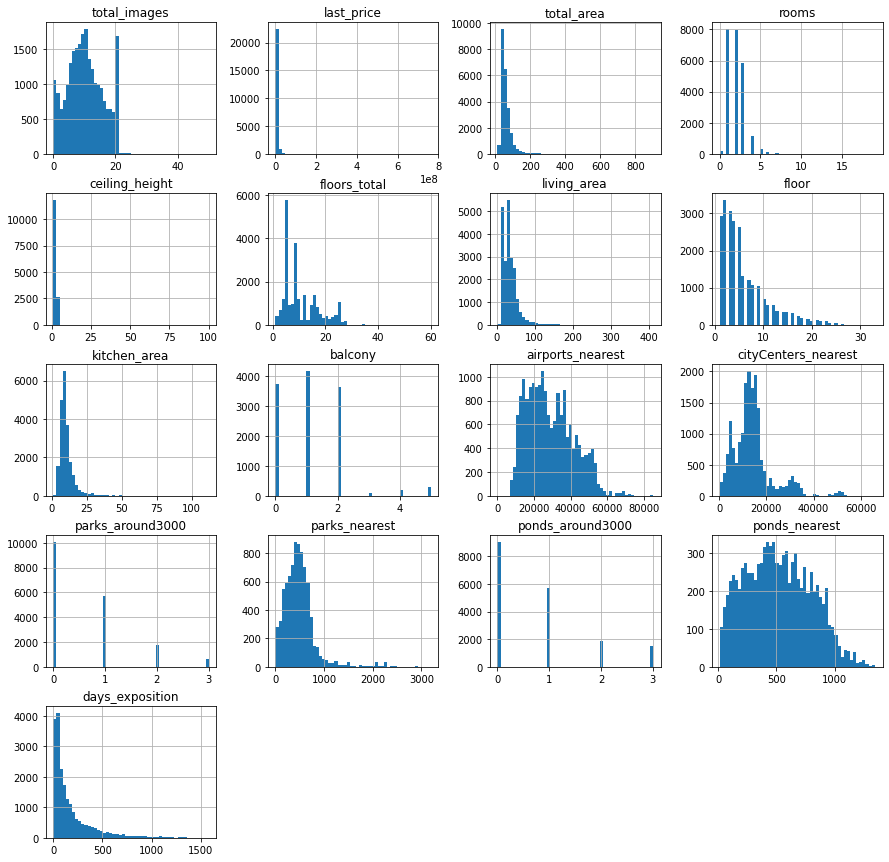

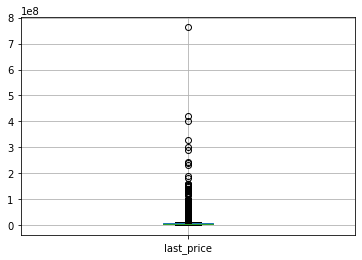

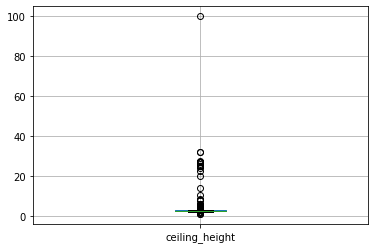

In [3]:
data.hist(figsize = (15, 15), bins = 50)
plt.show()

data.boxplot(['last_price'])
plt.show()

data.boxplot(['ceiling_height'])
plt.show()

<b>Вывод:</b>
Получен датафрейм на 23699 строк и 22 столбца.
Столбцы имеют различные типы данных - числовые, числовые с точкой, смешанные и булевы значения.

<b>Взглянув на несколько строк датафрейма, возникает мысль о смене типа данных в следующих столбцах:</b>
1) first_day_exposition - из object в datetime;

2) is_apartment - судя по всему здесь проставляется признак, да/нет, следовательно, должен быть тип bool;

<b>Кроме этого, имеются столбцы с пропущенными значениями:</b>

 
 5   ceiling_height        14504 non-null  float64 - высота потолков, вероятно этот атрибут по мнению продавцов не имеет значения и не заполнялся
 
 6   floors_total          23613 non-null  float64 - итого этажей в доме, учитывая небольшое количество пропусков (~0.4%) можно не учитывать их присутствие, либо установить медианное значение
 
 7   living_area           21796 non-null  float64 - жилая площадь - пропуски тут кажутся странными, т.к. показатель достаточно важный. Вероятно, продавцы решили ограничиться общей площадью жилья. Думаю, что пропуски тут можно заполнить, рассчитав среднюю долю жилой площади от общей и применив получившийся коэффициент к пропущенным значениям.
   
 9   is_apartment          2775 non-null   object - здесь, скорее всего, имеется ввиду признак - да или нет, т.е. булевое значение, где пропуску соответствует False, или 0. Будет произведена замена пропущенных значений на 0.
       
 12  kitchen_area          21421 non-null  float64 - достаточно много пропусков в площади кухни, вероятно получится заполнить пропуски по аналогии с living_area.
 
 13  balcony               12180 non-null  float64 - здесь указано количество балконов, в целом пропуски можно заменить на 0, скорее всего пропущенные значения говорят об отсутствии балкона.
 
 14  locality_name         23650 non-null  object - немного пропусков в наименовании города - думаю, не случится ничего страшного, если их просто удалить. Кроме этого, как описано в задании - нужно будет поработать с дубликатами.
 
 15  airports_nearest      18157 non-null  float64 - расстояние до ближайшего аэропорта. Тут есть несколько гипотиз по пропускам - а) либо есть лимит, выше которого значение не заполняется; б) при расчете расстояния действует ограничение в пределах населенного пункта и если в этом населенном пункте нет аэропорта - получается пропуск; в) либо продавцом указывается кривой адрес, от которого невозможно посчитать расстояние. Конечно же, остается шанс и на технические сбои при записи данных.
 
 16  cityCenters_nearest   18180 non-null  float64 - аналогично с предыдущим пунктом
 
 17  parks_around3000      18181 non-null  float64 - здесь достаточно просто объяснимы пропуски - в радиусе 3-х км просто нет парков
 
 18  parks_nearest         8079 non-null   float64 - аналогично аэропорту
 
 19  ponds_around3000      18181 non-null  float64 - аналогично паркам
 
 20  ponds_nearest         9110 non-null   float64 - аналогично аэропорту
 
 21  days_exposition       20518 non-null  float64 - здесь пропуски выглядят очень странными - кол-во дней, сколько было размещено объявление должно быть заполнено везде. Возможно, имеет место технический сбой, либо кривая логика записи данных (к примеру, если объявление было снято в день размещения - кол-во дней не заполняется). С другой стороны, возможно, что данные объявления висят до сих пор и не сняты.

<div class="alert alert-block alert-danger">
<h3> Комментарий ревьюера ❌<a class="tocSkip"></h3>

Отличная вводная информация по всем столбцам!
        
Стоит писать блоки загрузки библиотек и данных в разных ячейках. Если захочешь добавить дополнительную библиотеку, то датасет не будет загружаться заново, а вся предшествующая работа не обнулится.
        
Чтобы избавиться от информации о сабплотах перед графиками, можно добавить строку plt.show(). Но прежде нужно загрузить библиотеку matplotlib
    
Прокомментируй, пожалуйста, гистограммы. Можно тезисно, потому что углубленное изучение всё равно будет дальше. Рекомендую взять за привычку всегда описывать графики.    
    
В parks_around3000 пропуски могут означать как отсутствие рядом парков, так и то, что клиент не заполнил эту информацию. При 5000 пропусков заполнение было бы опасным, так как это может повлиять на общую картину. В целом, комментарии по пропускам логичны и исчерпывающи.

</div>

<div class="alert alert-block alert-info">
<h3> Комментарий студента  <a class="tocSkip"></h3>
    
По пунктам:
    
-загрузку бибилиотек разделил и зафиксировал себе на будущее совет;
    
-plt.show() применил, и также взял на вооружение;
    
-комментарии по гистограммам:
    
    1) total_images - видно нормальное распределение кол-ва фото, в большинстве не превышаюшее 20 шт на объявление. Примечательно, что довольно много объявлений с 20-ю фото - похоже, что таков бесплатный порог размещения фото.
    
    2) last_price - можно сделать вывод, что большинство объявлений со стоимостью до 10 миллионов, сама по себе гистограмма не показательна, т.к. присутствуют явные выбросы, которые смазывают картину. Дополнительно вызванный boxplot подтверждает данную гипотезу.
    
    3) total_area - абсолютное большинство объявлений укладывается в 100 кв. м. площади, здесь показатели кажутся нормальными.
    
    4) rooms - судя по картинкеЮ есть значения с 0 - необходимо на них обратить внимание. В целом, в абсолютном большинстве объявлений указано от 1 до 3 комнат, что является нормой.
    
    5) ceiling_height - здесь у нас не все в порядке, вызвав дополнительно boxplot можно наблюдать некоторое кол-во выбросов, которое будут обработаны далее.
    
    6) floors_total - здесь не наблюдается ничего необычного, можно отметить несколько пиков, судя по всему, наибольшее кол-во объявлений из старого фонда (5, 9 этажей), но и многоэтажки не сильно отстают.
    
    7) living_area - в целом гистограмма выглядит нормальной, можно отметить интересный момент с 2-мя пиками кол-ва значений.
    
    8) floor - здесь можно увидеть красивое распределение этажа квартир, с уменьшением кол-ва предложений от 1-го к 30-му. Выбросов не наблюдается.
    
    9) kitchen_area - в данном случае картинка кажется нормальной, в большинстве вариантов площадь кухни укладывается в 10 кв. м.
    
    10) balcony - на первый взгляд картинка кажется нормальной, но немного смущает заметное количество значений выше 4-х - возможно, стоит взглянуть на эти примеры.
    
    11) airports_nearest - здесь видим довольно широкое распределение значений, что на первый взгляд кажется нормой, т.к. в выборке присутствуют населенные пункты, явно не имющие собственного аэропорта. Единственный момент - значения ограничиваются примерно 90000 м., хотя кажется, что расстояния могут быть и больше.
    
    12) cityCenters_nearest - здесь также наблюдается широкий разброс значений, основное кол-во которых все же сконцетрировано в пределах 20000 м.
    
    13) park_around3000 - здесь все выглядит нормальным - целые значения, без явных выбросов.
    
    14) parks_nearest - картина кажется нормальной, в основном значения распределны в рамках 1000 м., явных выбросов не наблюдается.
    
    15) ponds_around3000 - здесь все выглядит нормальным - целые значения, без явных выбросов.
    
    16) ponds_nearest - примечательно, что большинство значений укладывается до 1000 м, при том, что все значения ограничиваются 1500 м. Выглядит довольно странно, конечно есть вероятность, что попали в выборку именно такие объявления, но тем не менее возможно какая-то ошибка либо ограничение.
    
    17) days_exposition - на гистограмме видно пиковое распределение значений ближе к нулю, но также присутствует длинный хвост практически до 1500 дней жизни обявления, что кажется странным.

 <div class="alert alert-success">
<h3> Комментарий ревьюера v2 ✔️<a class="tocSkip"> </h3>

 Отлично, основные моменты описаны. Очень хороший анализ гистограмм!
</div>

### Выполните предобработку данных

#### Начнем работу с заполнения пропусков, где это возможно (balcony, living_area, kitchen_area)

In [4]:
#Заполняем пропуски в balcony
data['balcony'] = data['balcony'].fillna(0)

#Заполняем пропуски в living_area - рассчитываем среднюю долю жилой площади и выводим жилую площадь в пропущенных значениях
data['living_area'] = data['living_area'].fillna(data['total_area'] * (data['living_area'] / data['total_area']).median())

#По аналогии с living_area заполняем пропуски в kitchen_area
data['kitchen_area'] = data['kitchen_area'].fillna(data['total_area'] * (data['kitchen_area'] / data['total_area']).median())

# Удалим пропуски в данных по этажам
data = data.dropna(subset = ['floors_total'])

#Вызываем info для проверки пропусков в столбцах
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23613 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23613 non-null  int64  
 1   last_price            23613 non-null  float64
 2   total_area            23613 non-null  float64
 3   first_day_exposition  23613 non-null  object 
 4   rooms                 23613 non-null  int64  
 5   ceiling_height        14495 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           23613 non-null  float64
 8   floor                 23613 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23613 non-null  bool   
 11  open_plan             23613 non-null  bool   
 12  kitchen_area          23613 non-null  float64
 13  balcony               23613 non-null  float64
 14  locality_name         23565 non-null  object 
 15  airports_nearest   

<div class="alert alert-block alert-danger">
<h3> Комментарий ревьюера ❌<a class="tocSkip"></h3>

Решение с заполнением площадей с помощью коэффициентов - хорошее. Но лучше использовать в качестве базы не среднее, а медиану. Так как выбросы не обрабатывались, среднее может быть смещено. Доработай этот момент, пожалуйста.
</div>

<div class="alert alert-block alert-info">
<h3> Комментарий студента  <a class="tocSkip"></h3>
    
Полностью согласен, поменял на median
    

 <div class="alert alert-success">
<h3> Комментарий ревьюера v2 ✔️<a class="tocSkip"> </h3>

 👍
</div>

#### Поменяем типы столбцов, где это целесообразно (first_day_exposition, is_apartment)

**Изменим тип столбцов в first_day_exposition, is_apartment, last_price. В конце вызовем метод info(), а также выведем часть записей для проверки результата.**

In [5]:
#data['first_day_exposition'] = data['first_day_exposition'].astype("datetime64[ns]")
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y.%m.%dT%H:%M:%S', errors = 'coerce')

In [6]:
data['is_apartment'] = data['is_apartment'].fillna(0)
data['is_apartment'] = data['is_apartment'].astype(bool)

data['last_price'] = data['last_price'].astype(int)
data['floors_total'] = data['floors_total'].astype(int)


data.info()
display(data.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23613 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23613 non-null  int64         
 1   last_price            23613 non-null  int64         
 2   total_area            23613 non-null  float64       
 3   first_day_exposition  23613 non-null  datetime64[ns]
 4   rooms                 23613 non-null  int64         
 5   ceiling_height        14495 non-null  float64       
 6   floors_total          23613 non-null  int64         
 7   living_area           23613 non-null  float64       
 8   floor                 23613 non-null  int64         
 9   is_apartment          23613 non-null  bool          
 10  studio                23613 non-null  bool          
 11  open_plan             23613 non-null  bool          
 12  kitchen_area          23613 non-null  float64       
 13  balcony         

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.000000,8,False,...,25.000000,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000,40.4,2018-12-04,1,NaN,11,18.600000,1,False,...,11.000000,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000,56.0,2015-08-20,2,NaN,5,34.300000,4,False,...,8.300000,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000,159.0,2015-07-24,3,NaN,14,90.289724,9,False,...,27.413793,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.000000,13,False,...,41.000000,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


<div class="alert alert-block alert-danger">
<h3> Комментарий ревьюера ❌<a class="tocSkip"></h3>

Даты и апартаменты обработаны верно. Но обработаны не все столбцы. Не может же в доме быть 8.5 этажей :)

</div>

<div class="alert alert-block alert-info">
<h3> Комментарий студента  <a class="tocSkip"></h3>
    
Да, действительно, проставил корректный тип

 <div class="alert alert-success">
<h3> Комментарий ревьюера v2 ✔️<a class="tocSkip"> </h3>

 Все столбцы приведены к корректному типу данных.
</div>

#### Избавимся от неявных дубликатов в столбце locality_name

<div class="alert alert-block alert-info">
Для начала посмотрим, какие уникальные значения есть в столбце locality_name\
-Прибегнув к старому доброму excel определил все дубли, а их, на минуточку, 59 - это неявные дубли названий.

In [7]:
data.groupby(by = ['locality_name'])['locality_name'].count()

locality_name
Бокситогорск             16
Волосово                 36
Волхов                  111
Всеволожск              398
Выборг                  237
                       ... 
село Путилово             2
село Рождествено          3
село Русско-Высоцкое      9
село Старая Ладога        2
село Шум                  1
Name: locality_name, Length: 364, dtype: int64

<div class="alert alert-block alert-info">
Сначала разберемся с буквой ё - меняем на е.
    
-В итоге, уникальных стало 331 - значит, что убрали 33 дубля

In [8]:
data['locality_name'] = data['locality_name'].str.replace('ё', 'е')
len(data['locality_name'].unique())

331

<div class="alert alert-block alert-info">
Теперь возьмемся за разные наименования типа одного и того же поселения (считаем, что наименование поселения уникально, а напутали именно с его типом).
    
-В итоге, дублей стало еще меньше - уникальных значений 321.

In [9]:
data['locality_name'] = (data['locality_name']
                         .replace(['городской поселок Большая Ижора', 'поселок станции Вещево', 'деревня Гарболово', 'деревня Зимитицы', 'деревня Калитино', 'Кудрово', 'коттеджный посёлок Лесное', 'городской посёлок Лесогорский', 'Любань', 'городской посёлок Мга', 'городской посёлок Назия', 'Никольское', 'поселок станции Приветнинское', 'поселок городского типа Приладожский', 'деревня Рабитицы', 'поселок городского типа Рахья', 'городской посёлок Советский', 'городской посёлок Фёдоровское', 'деревня Щеглово'], 
                                  ['поселок городского типа Большая Ижора', 'посёлок при железнодорожной станции Вещево', 'поселок Гарболово', 'поселок Зимитицы', 'поселок Калитино', 'деревня Кудрово', 'поселок Лесное', 'поселок городского типа Лесогорский', 'поселок Любань', 'посёлок городского типа Мга', 'поселок городского типа Назия', 'село Никольское', 'посёлок при железнодорожной станции Приветнинское', 'садовое товарищество Приладожский', 'поселок Рабитицы', 'садовое товарищество Рахья', 'поселок городского типа Советский', 'деревня Фёдоровское', 'посёлок Щеглово'])
                        )
len(data['locality_name'].unique())


321

<div class="alert alert-block alert-info">
Напоследок, отдельно разберемся с наименованиями, у которых было больше 1-го неявного дубля (часть решилась сменой ё на е). Почему отдельно - просто так захотелось.

-Итого, остается 318 уникальных наимнований

In [10]:
data['locality_name'] = (data['locality_name']
                         .replace(['Мурино', 'городской посёлок Павлово', 'село Павлово', 'городской посёлок Рощино', 'поселок Рябово'], 
                                  ['поселок Мурино', 'поселок городского типа Павлово', 'поселок городского типа Павлово', 'поселок городского типа Рощино', 'поселок городского типа Рябово'])
                        )
len(data['locality_name'].unique())


318

<div class="alert alert-block alert-info">
Подытожим задачу выводом уникальных значений

In [11]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'поселок Шушары', 'городской поселок Янино-1',
       'поселок Парголово', 'поселок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина',
       'деревня Федоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'поселок Металлострой',
       'поселок городского типа Лебяжье',
       'поселок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'поселок Аннино',
       'поселок городского типа Ефимовский', 'поселок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'поселок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', 'поселок Новый Свет

<div class="alert alert-block alert-danger">
<h3> Комментарий ревьюера ❌<a class="tocSkip"></h3>

Здорово, что ты сделал проверку в excel, но как можно узнать, что все дубли обработаны. Выведи хотя бы уникальные значения после обработки, пожалуйста. Проект нужно строить таким образом, чтобы он был построен логично и последовательно и вызывал минимум вопросов со стороны твоих коллег.
    
Можно ещё использовать такой метод заполнения:
    
    df = df.apply(lambda x: x.replace({'поселок':'посёлок', 'городской посёлок': 'посёлок', 'посёлок городского типа': 'посёлок', 'коттеджный посёлок': 'посёлок', 'посёлок при железнодорожной станции': 'посёлок станции'}, regex=True))
    
Стоит сказать, что все мысли и выводы стоит писать в ячейках маркдаун. # предназначен для описания работы именно кода. А код важно писать так, чтобы он умещался на экране монитора и не приходилось скроллить влево-вправо. Постарайся распределять блоки кода на несколько строк. Это улучшит читаемость проекта. 
</div>

<div class="alert alert-block alert-info">
<h3> Комментарий студента  <a class="tocSkip"></h3>
    
По основным замечаниям постарался все исправить.
Альтернативный способ заполнения значений сохранил себе на будущее

 <div class="alert alert-success">
<h3> Комментарий ревьюера v2 ✔️<a class="tocSkip"> </h3>

 Супер, теперь всё понятно и удобно описано. Дубликаты обработаны.
    
Альтернативно, можно было избавиться от всех префиксов и оставить только названия. Например, разделить строку по пробелу и оставить только последнее значение.
</div>

#### Настало время аномальных значений

<div class="alert alert-block alert-info">
Первым делом посмотрим на наши столбцы через describe (выше также есть гистограммы)

In [12]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23613.000000,2.361300e+04,23613.000000,23613.000000,14495.000000,23613.000000,23613.000000,23613.000000,23613.000000,23613.000000,18081.000000,18104.000000,18105.000000,8045.000000,18105.000000,9061.000000,20441.000000
mean,9.874518,6.540555e+06,60.340678,2.071147,2.771495,10.673824,34.586035,5.877313,10.488825,0.593063,28788.008185,14185.084015,0.611433,490.554630,0.770119,518.209469,180.884839
std,5.681541,1.090172e+07,35.648988,1.078380,1.261445,6.597173,22.353299,4.873539,6.029654,0.960307,12626.209956,8614.132292,0.802168,341.336698,0.939075,277.887489,219.685543
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,19.000000,2.000000,7.000000,0.000000,18575.000000,9233.750000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.000000,0.000000,26726.000000,13093.000000,0.000000,455.000000,1.000000,503.000000,95.000000
75%,14.000000,6.799000e+06,69.800000,3.000000,2.800000,16.000000,42.100000,8.000000,12.000000,1.000000,37242.000000,16287.000000,1.000000,612.000000,1.000000,730.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


<b>Сразу бросается в глаза непорядок с высотой потолков, на что и был намек в постановке задачи.
В целом, остальное кажется более-менее корректным.</b>

Взглянем подробнее на высоту потолков, а также посмотрим на кол-во строк с высотой 8 и более метров.

In [13]:
display(data['ceiling_height'].sort_values().unique())
display(len(data[data['ceiling_height']>=8]))

array([  1.  ,   1.2 ,   1.75,   2.  ,   2.2 ,   2.25,   2.3 ,   2.34,
         2.4 ,   2.45,   2.46,   2.47,   2.48,   2.49,   2.5 ,   2.51,
         2.52,   2.53,   2.54,   2.55,   2.56,   2.57,   2.58,   2.59,
         2.6 ,   2.61,   2.62,   2.63,   2.64,   2.65,   2.66,   2.67,
         2.68,   2.69,   2.7 ,   2.71,   2.72,   2.73,   2.74,   2.75,
         2.76,   2.77,   2.78,   2.79,   2.8 ,   2.81,   2.82,   2.83,
         2.84,   2.85,   2.86,   2.87,   2.88,   2.89,   2.9 ,   2.91,
         2.92,   2.93,   2.94,   2.95,   2.96,   2.97,   2.98,   2.99,
         3.  ,   3.01,   3.02,   3.03,   3.04,   3.05,   3.06,   3.07,
         3.08,   3.09,   3.1 ,   3.11,   3.12,   3.13,   3.14,   3.15,
         3.16,   3.17,   3.18,   3.2 ,   3.21,   3.22,   3.23,   3.24,
         3.25,   3.26,   3.27,   3.28,   3.29,   3.3 ,   3.31,   3.32,
         3.33,   3.34,   3.35,   3.36,   3.37,   3.38,   3.39,   3.4 ,
         3.42,   3.43,   3.44,   3.45,   3.46,   3.47,   3.48,   3.49,
      

29

<div class="alert alert-block alert-info">
В целом, выбросов не так много. Явные промахи с положением точки можно исправить, неявные - заменить на медиану (2,65). Поправим значения от 8 и выше


In [14]:
#data['ceiling_height'] = data['ceiling_height'].replace([8, 8.3, 10.3, 14, 20, 22.6, 100, 24, 25, 26, 27, 27.5, 32], [2.65, 2.65, 2.65, 2.65, 2.65, 2.65, 2.65, 2.4, 2.5, 2.6, 2.7, 2.75, 3.2])

#Применим вариант с логической индексацией:
data['ceiling_height'] = (data['ceiling_height']
                          .replace([24, 25, 26, 27, 27.5, 32], [2.4, 2.5, 2.6, 2.7, 2.75, 3.2]))

data.loc[data['ceiling_height'] >= 8]['ceiling_height'] = 2.65


display(data['ceiling_height'].sort_values().unique())

/tmp/ipykernel_271/2352471139.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[data['ceiling_height'] >= 8]['ceiling_height'] = 2.65


array([  1.  ,   1.2 ,   1.75,   2.  ,   2.2 ,   2.25,   2.3 ,   2.34,
         2.4 ,   2.45,   2.46,   2.47,   2.48,   2.49,   2.5 ,   2.51,
         2.52,   2.53,   2.54,   2.55,   2.56,   2.57,   2.58,   2.59,
         2.6 ,   2.61,   2.62,   2.63,   2.64,   2.65,   2.66,   2.67,
         2.68,   2.69,   2.7 ,   2.71,   2.72,   2.73,   2.74,   2.75,
         2.76,   2.77,   2.78,   2.79,   2.8 ,   2.81,   2.82,   2.83,
         2.84,   2.85,   2.86,   2.87,   2.88,   2.89,   2.9 ,   2.91,
         2.92,   2.93,   2.94,   2.95,   2.96,   2.97,   2.98,   2.99,
         3.  ,   3.01,   3.02,   3.03,   3.04,   3.05,   3.06,   3.07,
         3.08,   3.09,   3.1 ,   3.11,   3.12,   3.13,   3.14,   3.15,
         3.16,   3.17,   3.18,   3.2 ,   3.21,   3.22,   3.23,   3.24,
         3.25,   3.26,   3.27,   3.28,   3.29,   3.3 ,   3.31,   3.32,
         3.33,   3.34,   3.35,   3.36,   3.37,   3.38,   3.39,   3.4 ,
         3.42,   3.43,   3.44,   3.45,   3.46,   3.47,   3.48,   3.49,
      

<div class="alert alert-block alert-danger">
<h3> Комментарий ревьюера ❌<a class="tocSkip"></h3>

Попробуй использовать более автоматизированный способ заполнения. Например, с помощью логической индексации с указанием границы, после которой нужно менять значения. Если у тебя будет 100-200 таких значений, то вручную обрабатывать их будет мучительно.
       
И почему ты выбрал 2.65 в качестве основного значения? 
</div>

<div class="alert alert-block alert-info">
<h3> Комментарий студента  <a class="tocSkip"></h3>

Действительно, вариант с логической индексацией я не учел, постарался исправить ситуацию.
    
Взял 2.65 - т.к. это медианное значение. С одной стороны, кажется, что нужно вписать стандартные 2.7, но, с текущим изобилием различных вариантов высоты потолков - решил оставить ровно медиану.

 <div class="alert alert-success">
<h3> Комментарий ревьюера v2 ✔️<a class="tocSkip"> </h3>

 Супер, решение стало более оптимальным. А все значения после 20 можно было поделить на 10, чтобы не прописывать вручную
</div>

### Добавьте в таблицу новые столбцы

In [38]:
# Добавляем новый столбец с ценой за кв. метр
data['sq_m_price'] = round(data['last_price']/data['total_area'], 2)

# Добавялем новый столбец с днем недели (от 0 до 6) публикации объявления
data['weekday'] = data['first_day_exposition'].dt.weekday

# Добавляем месяц публикации объявления
data['month'] = data['first_day_exposition'].dt.month

# Добавляем год публикации объявления
data['year'] = data['first_day_exposition'].dt.year

# Тип этажа квартиры (первый, последний, другой) - пишем функцию:
def categorize_floor(row):
    floor = row['floor']
    floors_total = row['floors_total']
    try:
        if floor == 1:
            return 'первый'
        elif floor == floors_total:
            return 'последний'
        return 'другой'
    except:
        pass
data['floor_type'] = data.apply(categorize_floor, axis = 1)

# Расстояние до центра в км
data['citycenters_nearest_km'] = round(data['cityCenters_nearest'] / 1000, 0)

# Выводим первые 5 строк датафрейма для проверки изменений
display(data.head())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,sq_m_price,weekday,month,year,floor_type,citycenters_nearest_km
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.000000,8,False,...,482.0,2.0,755.0,NaN,120370.37,3,3,2019,другой,16.0
1,7,3350000,40.4,2018-12-04,1,NaN,11,18.600000,1,False,...,NaN,0.0,NaN,81.0,82920.79,1,12,2018,первый,19.0
2,10,5196000,56.0,2015-08-20,2,NaN,5,34.300000,4,False,...,90.0,2.0,574.0,558.0,92785.71,3,8,2015,другой,14.0
3,0,64900000,159.0,2015-07-24,3,NaN,14,90.289724,9,False,...,84.0,3.0,234.0,424.0,408176.10,4,7,2015,другой,7.0
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.000000,13,False,...,112.0,1.0,48.0,121.0,100000.00,1,6,2018,другой,8.0


<b>В целом, на этом этап предобработки данных завершается, переходим к анализу полученных данных.</b>

<div class="alert alert-block alert-danger">
<h3> Комментарий ревьюера ❌<a class="tocSkip"></h3>

Столбцы добавлены и готовы к работе.

Но не хватает промежуточного вывода по предобработке. Добавь его, пожалуйста.
</div>

<div class="alert alert-block alert-info">
<h3> Комментарий студента  <a class="tocSkip"></h3>

**Итого, что было сделано на этапе предобработки:**
    

1) Заполнены пропуски в balcony (пропуски заменены на 0), 
    
2) Заполнены пропуски в living_area и kitchen_area - рассчитаны значения на основе медианных долей
    
3) Удалены пропуски в данных по этажам (floors_total)
    
4) Изменены типы столбцов first_day_exposition на datetime, is_apartment на bool, last_price и floors_total - на int
    
5) Устранены неявные дубликаты в locality_name - дублирующие значения приведены к единому виду
    
6) Обработаны аномальные значения в стобце ceiling_height
    
7) Добавлены новые столбцы:
    
     а) день недели подачи объявления - weekday
    
     б) месяц подачи объявления - month
    
     в) год подачи объявления - year
    
     г) расстояние до центра в км - citycenters_nearest_km
    
     д) тип этажа квартиры - floor_type
    
     е) цена за 1 кв. м. - sq_m_price

 <div class="alert alert-success">
<h3> Комментарий ревьюера v2 ✔️<a class="tocSkip"> </h3>

 Отлично, проект теперь проще воспринимать.
</div>

### Проведите исследовательский анализ данных

 <div class="alert alert-success">
<h3> Комментарий ревьюера ✔️<a class="tocSkip"> </h3>
 
Рекомендую оформлять проект заголовками и подписями. На данном этапе я не буду обращать внимание на этот момент, но в следующих проектах это уже будет требованием.
    
Пример кода:
    
    plt.title('Название заголовка')
    plt.ylabel('Название оси ординат')
    plt.xlabel('Название оси абсцисс')
    plt.show()
    
Для лучшего понимания работы с гистограммами оставляю ссылку [примеры гистограмм и оформления](https://www.shanelynn.ie/bar-plots-in-python-using-pandas-dataframes/)
    
Ещё пара ссылок на полезные источники:
    
* [Как строить красивые графики на Python с Seaborn](https://habr.com/ru/companies/otus/articles/540526/)
    
* [Seaborn для визуализации данных в Python](https://pythonru.com/biblioteki/seaborn-plot)

#### Построим гистограммы для таблицы


Гистограмма для общей площади:

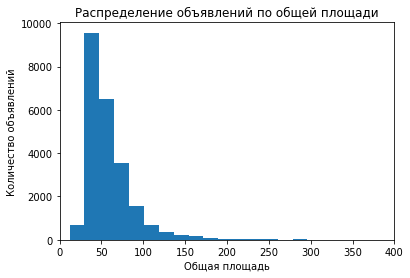

In [16]:
data['total_area'].plot(kind = 'hist', bins = 50)
plt.ylabel('Количество объявлений')
plt.xlabel('Общая площадь')
plt.title('Распределение объявлений по общей площади')
plt.xlim(0, 400)
plt.show()

Гистограмма для жилой площади:

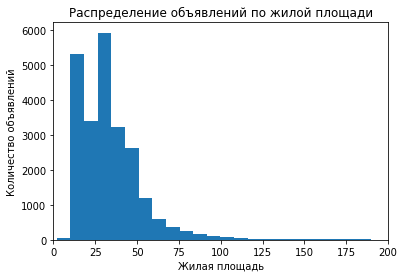

In [17]:
data['living_area'].plot(kind = 'hist', bins = 50)
plt.ylabel('Количество объявлений')
plt.xlabel('Жилая площадь')
plt.title('Распределение объявлений по жилой площади')
plt.xlim(0, 200)
plt.show()

Гистограмма для площади кухни:

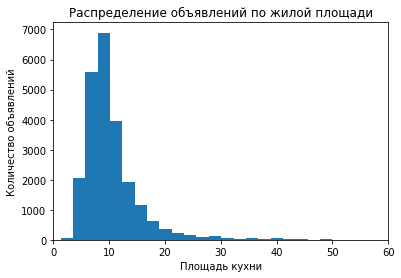

In [18]:
data['kitchen_area'].plot(kind = 'hist', bins = 50)
plt.ylabel('Количество объявлений')
plt.xlabel('Площадь кухни')
plt.title('Распределение объявлений по жилой площади')
plt.xlim(0, 60)
plt.show()

<div class="alert alert-block alert-info">
<h3> Комментарий студента  <a class="tocSkip"></h3>

Промежуточный вывод по гистограммам площадей:
    
1) общая площадь - абсолютное большинство объявлений укладывается в рамки до 100 кв.м., пик объявлений приходится на +/- 50 кв.м. В целом картина выглядит нормальной.
    
2) жилая площадь - здесь можно обратить внимание на 2 четких пика объявлений - примерно на 30-40 кв.м., что в целом не вызывает вопросов, и пик на около 10 кв.м. - возможно, сюда попали комнаты в общежитиях/коммуналках?
    
3) площадь кухни - ничего особенного на гистограмме не видно, можем наблюдать нормальный пик в пределах 6-15 кв.м.
    
    
    

 <div class="alert alert-success">
<h3> Комментарий ревьюера v2 ✔️<a class="tocSkip"> </h3>

 Супер, всё верно
</div>

Теперь выведем гистограмму по цене объекта:

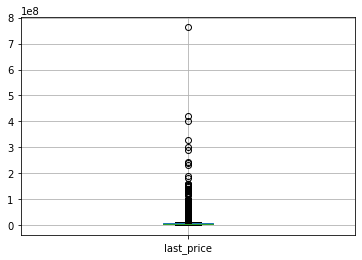

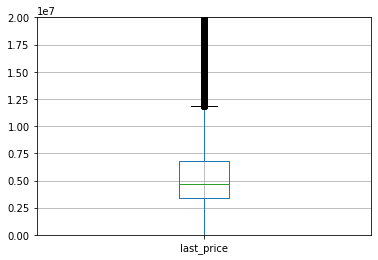

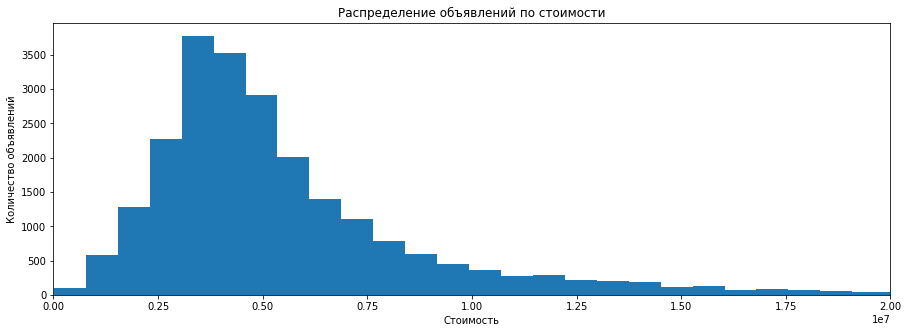

In [19]:
data.boxplot('last_price')
plt.show()

data.boxplot('last_price')
plt.ylim(0, 20000000)
plt.show()

data['last_price'].plot(kind = 'hist', bins = 1000, figsize = (15, 5))
plt.ylabel('Количество объявлений')
plt.xlabel('Стоимость')
plt.title('Распределение объявлений по стоимости')
plt.xlim(0, 20000000)
plt.show()

<div class="alert alert-block alert-info">
<h3> Комментарий студента  <a class="tocSkip"></h3>

Что видим по цене - максимально количество объявлений сосредоточено в ценовом диапазоне 2.5-6 млн.

Кроме этого, можно сделать вывод о значительном количестве выбросов, взглянув на боксплот. Медиана находится на уровне примерно 5 млн, 3-й квартиль - примерно 7 млн, а за верхним усом расположено большое кол-во выбросов, которое формрует жирную линию.

 <div class="alert alert-success">
<h3> Комментарий ревьюера v2 ✔️<a class="tocSkip"> </h3>

 Верно. Круто, что что ограничил боксплот по вертикальной оси.
</div>

Строим гистограмму по кол-ву комнат в объявлениях

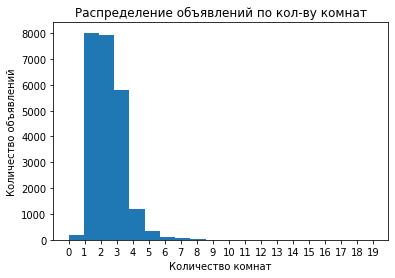

In [20]:
data['rooms'].plot(kind = 'hist', bins = 20)
plt.ylabel('Количество объявлений')
plt.xlabel('Количество комнат')
plt.title('Распределение объявлений по кол-ву комнат')
plt.xticks(np.arange(min(data['rooms']), max(data['rooms'])+1, 1.0))
plt.show()

<div class="alert alert-block alert-info">
<h3> Комментарий студента  <a class="tocSkip"></h3>

Здесь картина вполне ожидаемая - максимальное кол-во объявлений от 1 до 3 комнат. Однако, имеется некоторое количество объявлений 0 комнат - судя по всему, здесь имеет быть ошибка либо продавец не заполнил эту информацию


 <div class="alert alert-success">
<h3> Комментарий ревьюера v2 ✔️<a class="tocSkip"> </h3>

 Да, согласен с тобой
</div>

Построим гистограмму по высоте потолка:

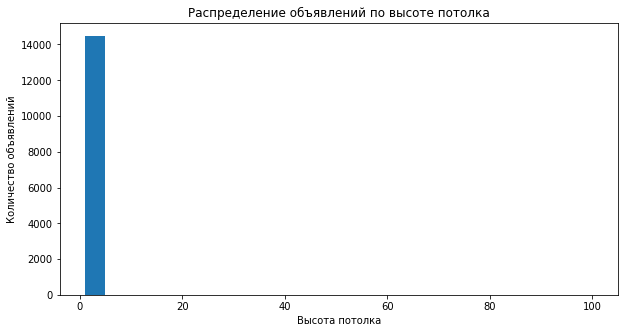

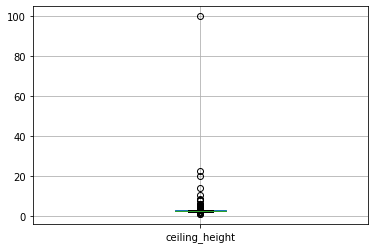

In [21]:
data['ceiling_height'].plot(kind = 'hist', bins = 25, figsize = (10, 5))
plt.ylabel('Количество объявлений')
plt.xlabel('Высота потолка')
plt.title('Распределение объявлений по высоте потолка')
plt.show()

data.boxplot('ceiling_height')
plt.show()

<div class="alert alert-block alert-info">
<h3> Комментарий студента  <a class="tocSkip"></h3>

По высоте потолков видно, что большинство значений укладывается в привычные 2.5 - 3 метра, однако здесь есть немалое кол-во выбросов, большинство из которых приходится на правую часть.

 <div class="alert alert-success">
<h3> Комментарий ревьюера v2 ✔️<a class="tocSkip"> </h3>

 Верно
</div>

Строим гистограмму по типу этажа:

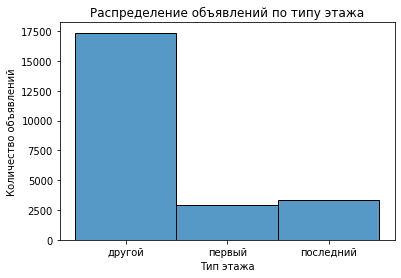

In [22]:
sns.histplot(data['floor_type'])
plt.ylabel('Количество объявлений')
plt.xlabel('Тип этажа')
plt.title('Распределение объявлений по типу этажа')
plt.show()

<div class="alert alert-block alert-info">
<h3> Комментарий студента  <a class="tocSkip"></h3>

Распределение предложений по типу этажа выглядит нормальным: большинство объявлений сконцентрировано в типе "Другой" и малая часть имеет типы "первый" и "последний".

 <div class="alert alert-success">
<h3> Комментарий ревьюера v2 ✔️<a class="tocSkip"> </h3>

 Согласен
</div>

Строим гистограмму по количеству этажей в доме:

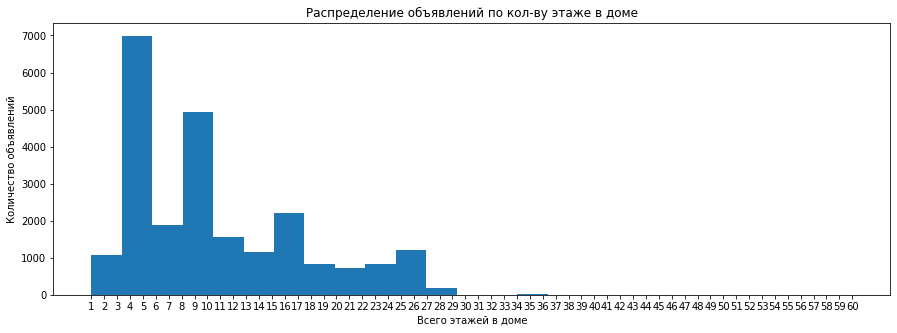

In [23]:
data['floors_total'].plot(kind = 'hist', bins = 25, figsize = (15, 5))
plt.ylabel('Количество объявлений')
plt.xlabel('Всего этажей в доме')
plt.title('Распределение объявлений по кол-ву этаже в доме')
plt.xticks(np.arange(min(data['floors_total']), max(data['floors_total'])+1, 1.0))
plt.show()

<div class="alert alert-block alert-info">
<h3> Комментарий студента  <a class="tocSkip"></h3>

Здесь в целом нормальная картина распределения значений, можно отметить пиковые значения - 4-5 и 9-10 этажи, судя по всему, это дома старой постройки, доля которых является преобладающей.

 <div class="alert alert-success">
<h3> Комментарий ревьюера v2 ✔️<a class="tocSkip"> </h3>

 Да, верно. На пиках, видимо, обозначены типичные застройки.
</div>

Строим гистограмму по расстоянию до центра города в метрах:

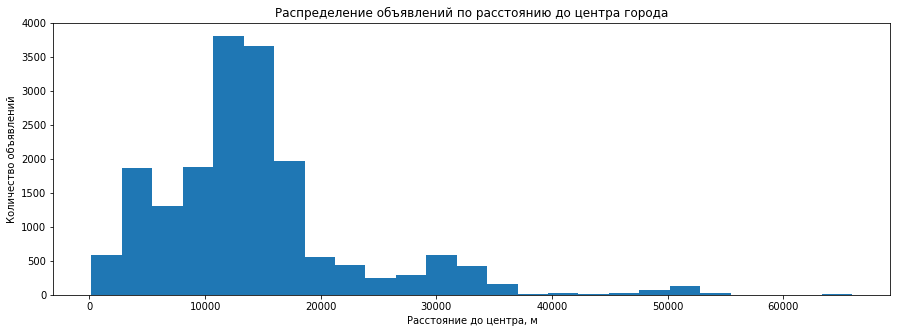

In [24]:
data['cityCenters_nearest'].plot(kind = 'hist', bins = 25, figsize = (15, 5))
plt.ylabel('Количество объявлений')
plt.xlabel('Расстояние до центра, м')
plt.title('Распределение объявлений по расстоянию до центра города')
plt.show()

<div class="alert alert-block alert-info">
<h3> Комментарий студента  <a class="tocSkip"></h3>

По расстоянию до центра города видно, что большинство объявлений находится в пределах 20000 м, при этом, заметная часть объявлений размазана на расстоянии выше 20 000 м от центра. Также можно обратить внимание, что в черте города имеется отдаленный район (районы), находящиеся в 50 000 м и далее от центра.

 <div class="alert alert-success">
<h3> Комментарий ревьюера v2 ✔️<a class="tocSkip"> </h3>

 Верно
</div>

Строим гистограмму по расстоянию до ближайшего парка:

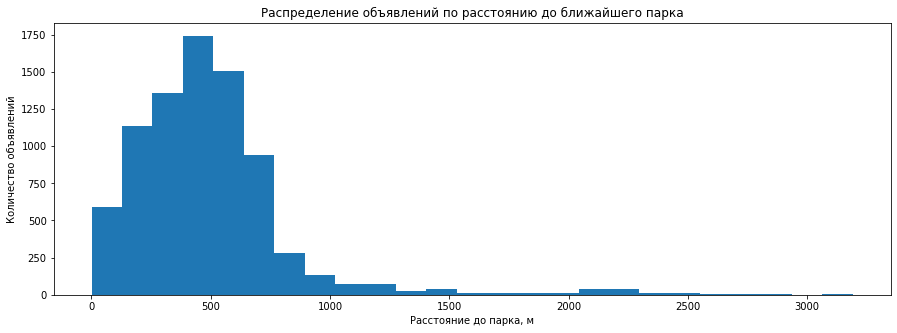

In [25]:
data['parks_nearest'].plot(kind = 'hist', bins = 25, figsize = (15, 5))
plt.ylabel('Количество объявлений')
plt.xlabel('Расстояние до парка, м')
plt.title('Распределение объявлений по расстоянию до ближайшего парка')
plt.show()

<div class="alert alert-block alert-info">
<h3> Комментарий студента  <a class="tocSkip"></h3>
    
По расстоянию до ближайшего парка можем сделать вывод, что в большинстве случаев, где эта информация заполнена, ближайшие парки находятся в радиусе 1000 м

 <div class="alert alert-success">
<h3> Комментарий ревьюера v2 ✔️<a class="tocSkip"> </h3>

 Да, всё так
</div>

<b>Что видим на гистограммах:</b>

1) общая площадь - абсолютное большинство объявлений укладывается в рамки до 100 кв.м.

2) жилая площадь - аналогично общей площади, в целом эти показатели укладываются друг в друга

3) площадь кухни - то же можно сказать и о площадим кухни

4) цена объекта - абсолютное большинство цен также укладываются в один диапазон, биз сильных перекосов

5) количество комнат - большинство значений находится в пределах нормальных

6) высота потолков - большинство значений сконцентрировано в диапазоне 2-4 м, что также является нормальным

7) тип этажа квартиры («первый», «последний», «другой») - на первый взгляд, видно нормальное распределение значений, большинство этажей имеет тип "другой"

8) общее количество этажей в доме - здесь имеем значения в рамках нормальных величин, большинство предложений в домах до 20 этажей

9) расстояние до центра города в метрах - здесь видим, что большинство предложений находятся в рамках ~ 25000 метров от центра. При этом, есть предложения в пределах ~ 55000 метров от центра, такое возможно, если квартира расположена на окраинах Санкт-Петербурга.

10) расстояние до ближайшего парка - в большинстве случаев, парки находятся в пределах 1500 метров.

Отдельно можно отметить, что есть странности в количестве парков и водоемов в радиусе 3 км - здесь присутствуют дробные значения. Однако для анализа эти данные врядли прицнипиальны, но тем не менее, в дальнейшем округлим их и тоже посмотрим, какое влияние они оказывают на цену.

 <div class="alert alert-success">
<h3> Комментарий ревьюера v2 ✔️<a class="tocSkip"> </h3>

 Хороший промежуточный вывод. Все данные учтены
</div>

<div class="alert alert-block alert-danger">
<h3> Комментарий ревьюера ❌<a class="tocSkip"></h3>

Такой графический анализ, к сожалению, упускает много параметров. Столбцы в разных масштабах не стоит выводить на одном изображении. 
    
Выведи, пожалуйста, все графики по отдельности. Если хочешь более автоматизированный вариант, то можно воспользоваться циклами. Но всё равно лучше одновременно не выводить больше 2-3 графиков, чтобы проект можно было легко воспринимать. Некоторые столбцы могут потребовать контроля границ по горизонтальной оси. Выводы, пожалуйста, добавь либо под каждый график, либо под смысловые блоки, чтобы не приходилось читать выводы по 10 графикам одновременно.
    
Для этого можно воспользоваться кодом: plt.xlim() (по вертикальной оси - plt.ylim())
    
Для оценки главных диапазонов значений и выбросов часто используют боксплоты. Это достаточно простой и удобный инструмент.
    
</div>

#### Смотрим на скорость продажи

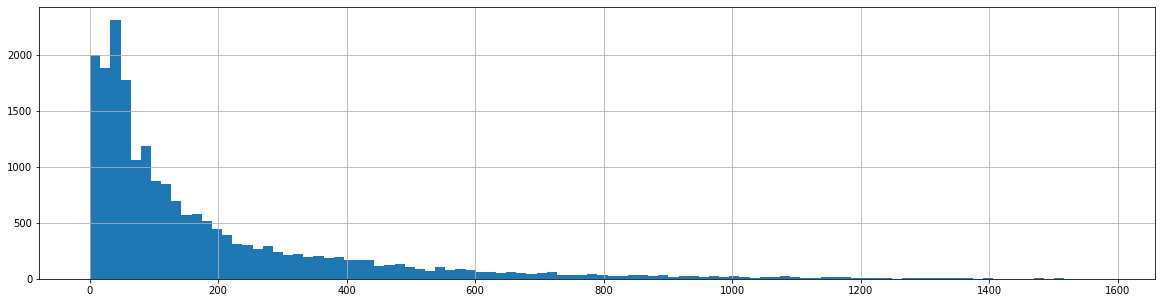

count    20441.000000
mean       180.884839
std        219.685543
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

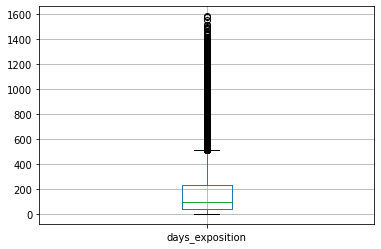

In [26]:
#Посмотрим отдельно гистограмму по дням активности объявления, а также глянем на медиану и среднее
plt.show(data['days_exposition'].hist(bins = 100, figsize = (20, 5)))
display(data['days_exposition'].describe())
plt.show(data.boxplot('days_exposition'))

Судя по гистограмме, большая часть объявлений живет примерно 3 месяца, однако есть ощутимая часть объявлений, которые висят от 6 месяцев до нескольких лет.

При этом, среднее время жизни объявления - 180 дней, медиана - 95.

Итого, можно сделать вывод, что половина квартир продается в течение 3-х месяцев - что кажется нормой, учитывая стоимость и масштаб покупки, при этом, 3/4 квартир продается уже почти за 8 месяцев.

Странными кажутся объявления, которые висят от года и выше - здесь явно что-то не так и таких объявлений довольно много.

 <div class="alert alert-success">
<h3> Комментарий ревьюера v2 ✔️<a class="tocSkip"> </h3>

 Анализ стал ещё точнее. Действительно, некоторые квартиры висят слишком долго.
</div>

 <div class="alert alert-success">
<h3> Комментарий ревьюера ✔️<a class="tocSkip"> </h3>

 Всё описано верно!
    
В этом задании боксплот так же может упростить задачу.
</div>

#### Смотрим зависимость цены от различных параметров

**Блок 1 - количественные переменные для анализа цен**

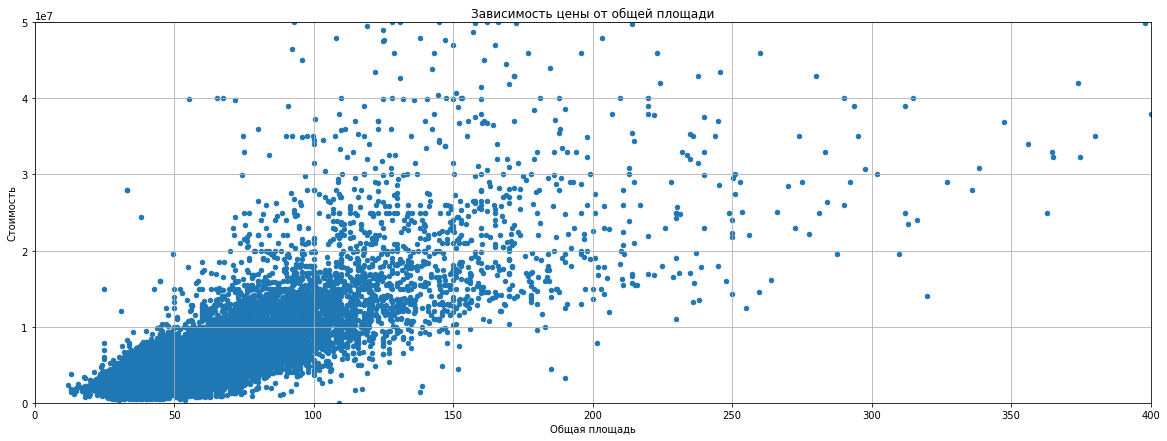

0.6535810085611219

In [27]:
(data.plot(grid = True, xlabel = 'Общая площадь',ylabel = 'Стоимость', 
      title = 'Зависимость цены от общей площади', figsize = (20, 7),
           x = 'total_area', y = 'last_price', kind = 'scatter'))
plt.xlim(0, 400)
plt.ylim(0, 50000000)
plt.show()

display(data['last_price'].corr(data['total_area']))

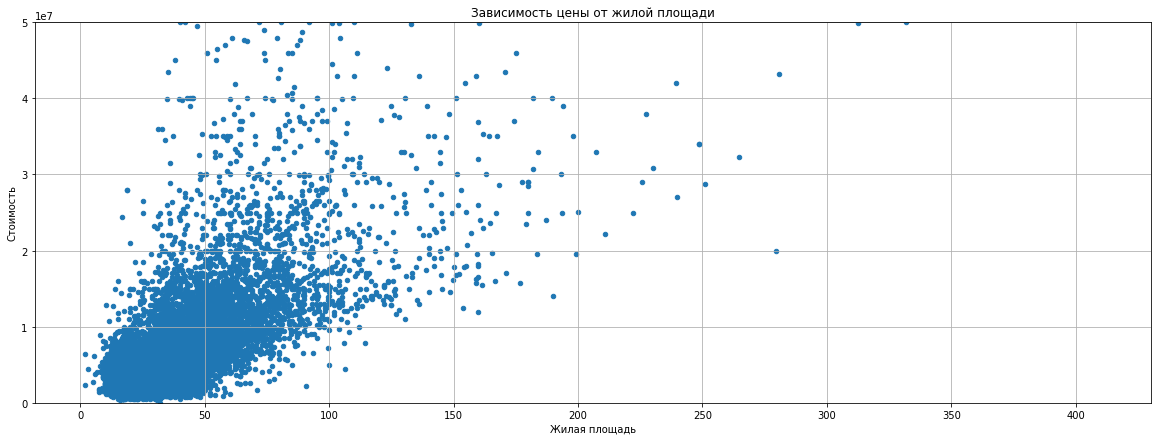

0.585607343474838

In [28]:
(data.plot(grid = True, xlabel = 'Жилая площадь',ylabel = 'Стоимость', 
      title = 'Зависимость цены от жилой площади', figsize = (20, 7),
           x = 'living_area', y = 'last_price', kind = 'scatter'))
plt.ylim(0, 50000000)
plt.show()

display(data['last_price'].corr(data['living_area']))

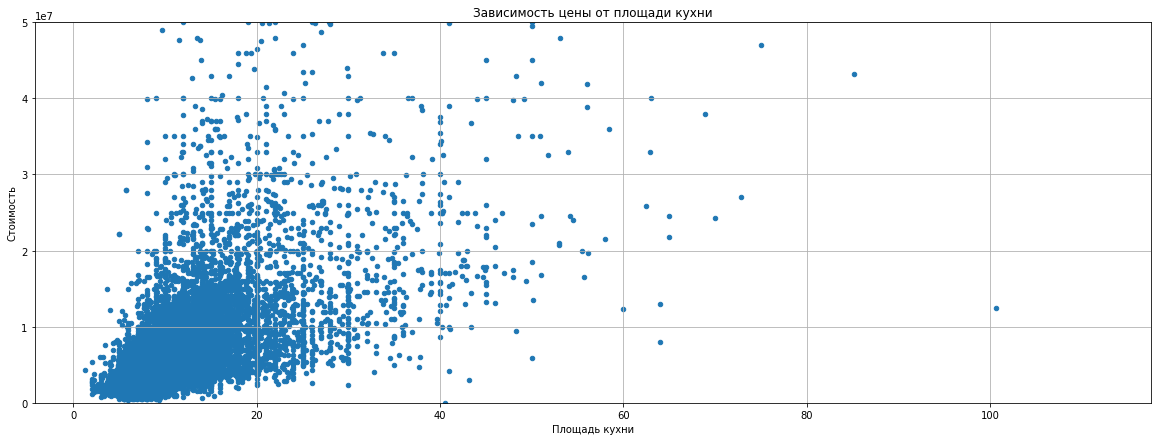

0.5135450641339793

In [29]:
(data.plot(grid = True, xlabel = 'Площадь кухни',ylabel = 'Стоимость', 
      title = 'Зависимость цены от площади кухни', figsize = (20, 7),
           x = 'kitchen_area', y = 'last_price', kind = 'scatter'))
plt.ylim(0, 50000000)
plt.show()

display(data['last_price'].corr(data['kitchen_area']))

<div class="alert alert-block alert-info">
<h3> Комментарий студента  <a class="tocSkip"></h3>
    
По зависимости разного типа площадей и стоимости можно сделать следующий вывод:
    
Максимальная зависимость цены наблюдается от общей площади, коэффициент корреляции при этом - 0.65, что несколько выше корреляции от жилой площади (0.59) и площади кухни (0.51).

 <div class="alert alert-success">
<h3> Комментарий ревьюера v2 ✔️<a class="tocSkip"> </h3>

 Отличные показательные графики. Описанные коэффициенты умеренной силы.
</div>

**Блок 2 - категориальные переменные для анализа цен**

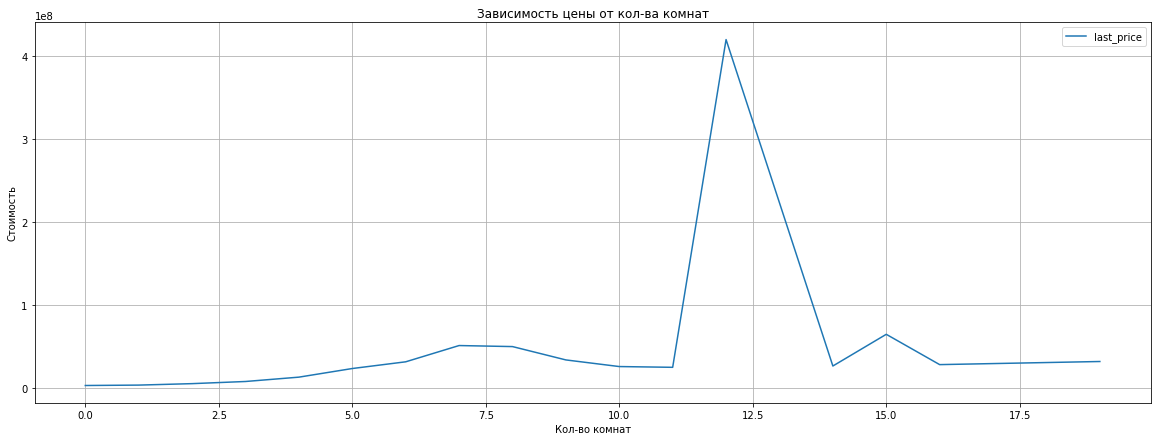

In [30]:
(data.pivot_table(index = 'rooms', values = 'last_price')
 .plot(grid = True, xlabel = 'Кол-во комнат',ylabel = 'Стоимость', 
       title = 'Зависимость цены от кол-ва комнат', figsize = (20, 7)))
plt.show()

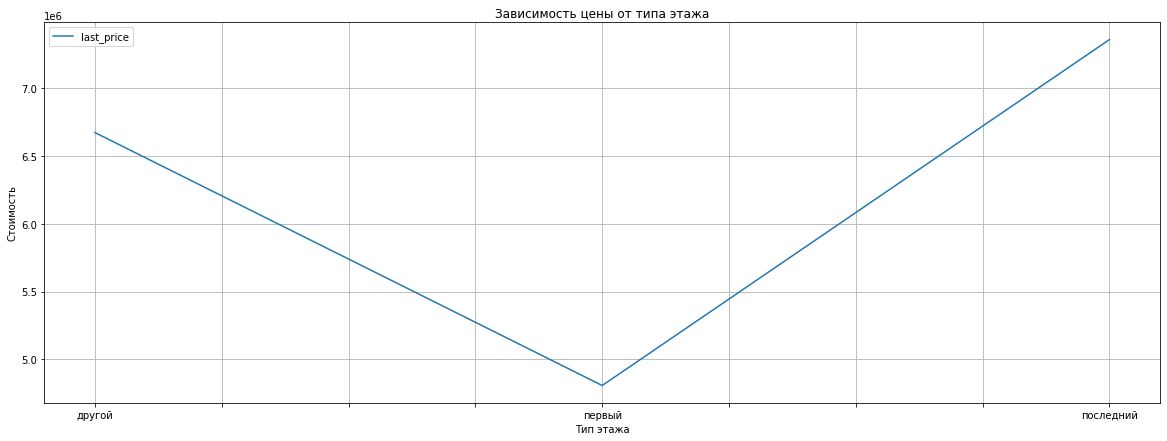

In [31]:
(data.pivot_table(index = 'floor_type', values = 'last_price')
 .plot(grid = True, xlabel = 'Тип этажа',ylabel = 'Стоимость', 
       title = 'Зависимость цены от типа этажа', figsize = (20, 7)))
plt.show()


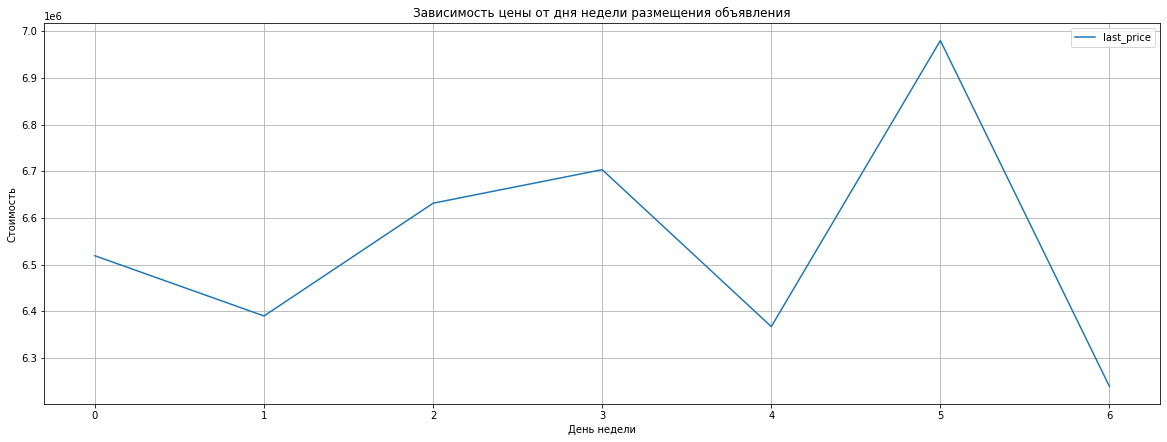

In [32]:
(data.pivot_table(index = 'weekday', values = 'last_price')
.plot(grid = True, xlabel = 'День недели',ylabel = 'Стоимость', 
      title = 'Зависимость цены от дня недели размещения объявления', figsize = (20, 7)))
plt.show()

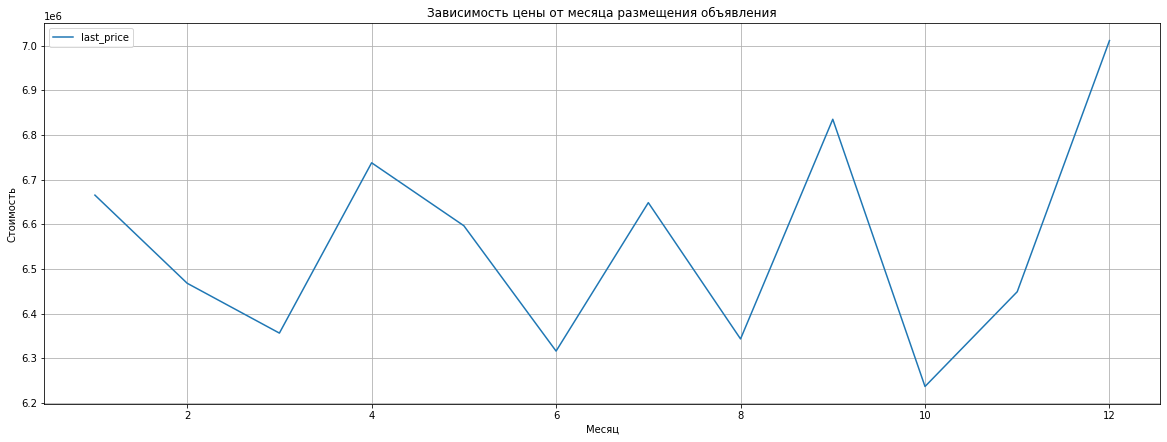

In [33]:
(data.pivot_table(index = 'month', values = 'last_price')
 .plot(grid = True, xlabel = 'Месяц',ylabel = 'Стоимость', 
       title = 'Зависимость цены от месяца размещения объявления', figsize = (20, 7)))
plt.show()

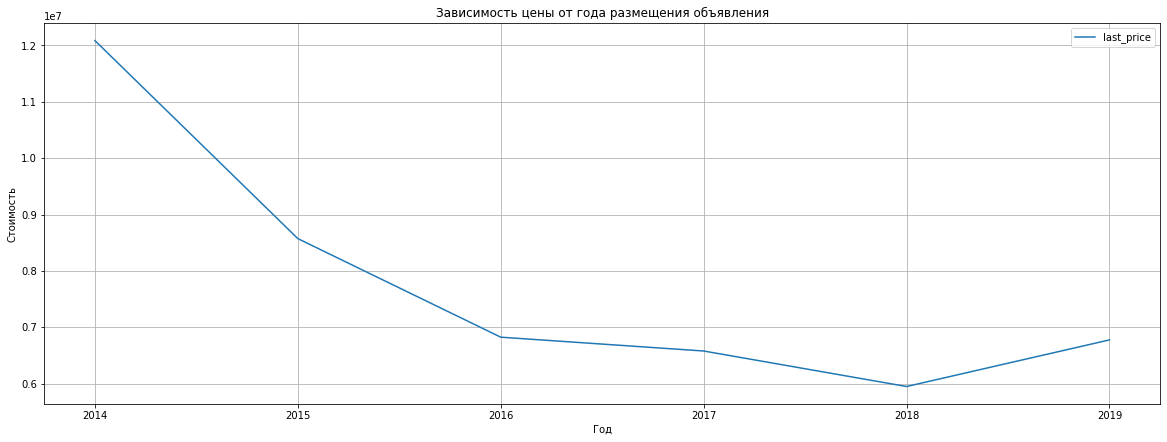

In [34]:
(data.pivot_table(index = 'year', values = 'last_price')
 .plot(grid = True, xlabel = 'Год',ylabel = 'Стоимость', 
       title = 'Зависимость цены от года размещения объявления', figsize = (20, 7)))
plt.show()

**Какие выводы можно сделать на основе графиков:**
1. Площадь (объеденим все типы площади, т.к. они между собой довольно плотно коррелируют) - в целом, с ростом площади растет и цена, однако, есть большое количество предложений со схожими площадями но очень сильно отличающейся ценой - здесь главную роль играет локация объекта, расстояние до центра и тд.
2. Количество комнат - опять же, совершенно логично, что с ростом кол-ва комнат растет и цена. Можно отметить, что плавный рост продолжается до 7-ми комнат, после их количество неявно влияет на стоимость, т.к. в таком сегменте встречаются нестандартные варианты площадей и планировок + количество таких объявление небольшое.
3. Тип этажа - данный показатель явно влияет на стоимость - однозначно можно увидеть, что наиболее низкая стоимость у вариантов, расположенных на 1-м этаже, высокая - на последнем. Насчет высокой стоимости квартир на последнем этаже, можно выдвинуть гипотезу, что большие квартиры - пентхаусы чаще встречаются на последных этажах и ощутимо влияют на среднюю стоимость сегмента в целом.
4. День подачи объявления - здесь складывается интересная статистика, самые дорогие объявления подаются в субботу, самые дешевые - в воскресенье. Далее средняя цена поданных объявлений растет вплоть до четверга и в пятницу снова падает. Почему так происходит - загадка...
5. Месяц подачи объявления - здесь можно разглядеть признаки некой сезональности динамики цен - взлет и падение цен сменяют друг друга практически каждые 2 месяца, наивысшая стоимость достигается в последний месяц года, наиболее низкая - в октябре. 
6. Год подачи объявления - с 2014 по 2019 год можно наблюдать достаточно значительное понижение средней стоимости объявлений - вероятно, что предложение постепенно превышает спрос, а также можно проверить другую гипотезу - возможно деградирует сегмент премиального жилья с высокой стоимостью.

<div class="alert alert-block alert-danger">
<h3> Комментарий ревьюера ❌<a class="tocSkip"></h3>

Графики по категориальным данным описаны верно. Хороший анализ!

Но представленные числовые столбцы (цена и все площади) необходимо проанализировать с помощью коэффициента корреляции Пирсона - .corr()

И добавить по заменить по тем же столбцам графики на диаграммы рассеяния - scatterplot

Для категориальных данных коэффициент Пирсона не показателен, поэтому по ним всё сделано верно.
</div>

<div class="alert alert-block alert-info">
<h3> Комментарий студента  <a class="tocSkip"></h3>
    
Поправил, добавил отдельный подитог к блоку с количественными переменными.

 <div class="alert alert-success">
<h3> Комментарий ревьюера v2 ✔️<a class="tocSkip"> </h3>

 👍
</div>

#### Рассмотрим среднюю стоимость квадратного метра в топ-10 населенных пунктов по кол-ву объявлений

In [35]:
# Выодим топ-10 локаций с помощью сводной таблицы и некоторых манипуляций по приведению таблицы в удобный вид
#top_locations = data.pivot_table(index = 'locality_name', values = ('last_price', 'total_area'), aggfunc = ('sum', 'count'))
#top_locations.columns = ['count', 'total_price_sum', 'count_a', 'total_area_sum']
#top_locations = top_locations.drop('count_a', axis = 1)
#top_locations = top_locations.sort_values(by = 'count', ascending = False).head(10)
#top_locations['sq_m_price'] = round(top_locations['total_price_sum']/top_locations['total_area_sum']).astype(int)
#display(top_locations.sort_values(by = 'sq_m_price'))

<div class="alert alert-warning">
    <h3> Комментарий ревьюера v2⚠️<a class="tocSkip"> </h3>

Лучше не оставлять закомментированный код. Это может приводить к ошибкам и делает проект неаккуратным. И это требование стилевого гайда PEP8. Думаю, что по тем же причинам.

</div>

In [39]:
# Выодим топ-10 локаций с помощью сводной таблицы и некоторых манипуляций по приведению таблицы в удобный вид
top_locations = data.pivot_table(index = 'locality_name', values = 'sq_m_price', aggfunc = ('median', 'count'))
top_locations = top_locations.sort_values(by = 'count', ascending = False).head(10)
display(top_locations)

,count,median
locality_name,,
Санкт-Петербург,15651,104774.540
поселок Мурино,586,86250.375
деревня Кудрово,470,95555.315
поселок Шушары,439,76829.270
Всеволожск,398,65789.470
Пушкин,369,100000.000
Колпино,338,74723.745
поселок Парголово,327,91642.860
Гатчина,307,67796.610


<b>Вывод:</b>

Среди топ-10 населенных пунктов по кол-ву объявлений, на 1-м месте с гигантским отрывом располагается Санкт-Петербург. Кроме этого, культурная столица также №1 по стоимости 1 квадратого метра, что является нормой, учитывая, что речь о мегаполисе и пригородных поселках и городах поменьше.

Населенный пункт, с самыми низкими ценами на 1 кв. метр среди топ-10 - Выборг, примечательно, что Выборг также занимает последнее место и по кол-ву объявлений.

<div class="alert alert-block alert-danger">
<h3> Комментарий ревьюера ❌<a class="tocSkip"></h3>

Расчёты и выводы верны. Но я бы изменил подход, ведь нам требуется найти стоимость квадратного метра для каждой квартиры, а не стоимость квадратного метра квартир в городе. Ранее для этих нужд уже был создан столбец. Воспользуйся им, пожалуйста. И по нему добавь расчёт среднего, а лучше медианы, чтобы избежать влияния выбросов, в aggfunc.
</div>

<div class="alert alert-block alert-info">
<h3> Комментарий студента  <a class="tocSkip"></h3>
    
Исправлено

 <div class="alert alert-success">
<h3> Комментарий ревьюера v2 ✔️<a class="tocSkip"> </h3>

 Отлично, подход верный. С выводами согласен
</div>

#### Теперь рассмотрим стоимость жилья в Санкт-Петербурге, в завимисоти отдаления жилья от центра города.

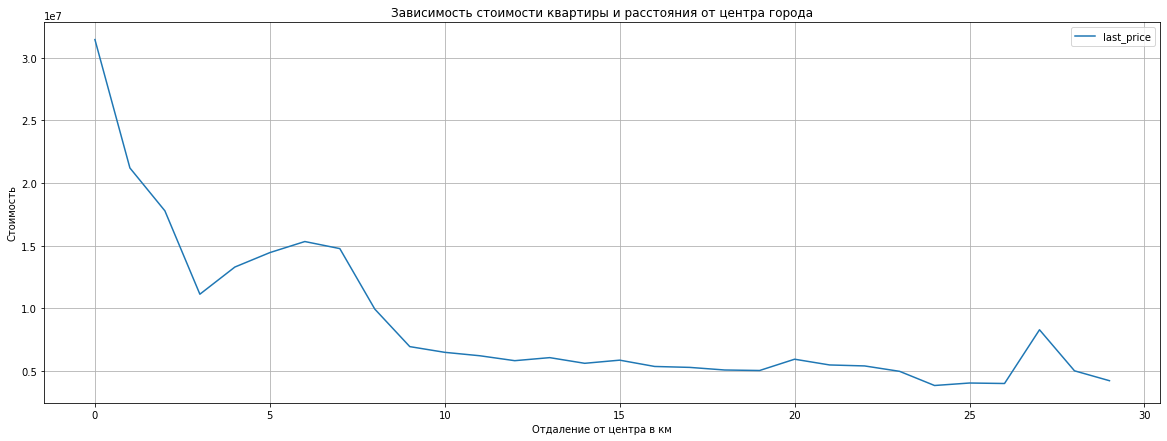

In [40]:
data_spb = data.query('locality_name == "Санкт-Петербург"')
(data_spb.pivot_table(index = 'citycenters_nearest_km', values = 'last_price')
.plot(grid = True, xlabel = 'Отдаление от центра в км',ylabel = 'Стоимость', 
      title = 'Зависимость стоимости квартиры и расстояния от центра города', figsize = (20, 7)))
plt.show()

Здесь видно нормальную картину распределения средней стоимости квартир - чем ближе к центру, тем дороже.

Да, не исключены подъемы в некоторых местах - это может быть обусловленно особенностями локации, общий тренд здесь прослеживается довольно четко.

Кроме этого, есть еще интересная особенность - после отметки в 10 км от центра - темы сниженния цен сильно замедляются, выходим практически на плато цен.

<div class="alert alert-block alert-danger">
<h3> Комментарий ревьюера ❌<a class="tocSkip"></h3>

Да, абсолютно верно.

Но добавь, пожалуйста, промежуточный выод по всему этапу исследовательской части.
</div>

#### Итого по разделу

**Что можно сказать по исследовательской части:**

**1.Анализ предложений по различным параметрам:**

1) общая площадь - абсолютное большинство объявлений укладывается в рамки до 100 кв.м., пик объявлений приходится на +/- 50 кв.м. В целом картина выглядит нормальной.

2) жилая площадь - здесь можно обратить внимание на 2 четких пика объявлений - примерно на 30-40 кв.м., что в целом не вызывает вопросов, и пик на около 10 кв.м. - возможно, сюда попали комнаты в общежитиях/коммуналках?

3) площадь кухни - ничего особенного на гистограмме не видно, можем наблюдать нормальный пик в пределах 6-15 кв.м.

4) Что видим по цене - максимально количество объявлений сосредоточено в ценовом диапазоне 2.5-6 млн. Кроме этого, можно сделать вывод о значительном количестве выбросов, взглянув на боксплот. Медиана находится на уровне примерно 5 млн, 3-й квартиль - примерно 7 млн, а за правым усом расположено большое кол-во выбросов.

5) По кол-ву комнат картина вполне ожидаемая - максимальное кол-во объявлений от 1 до 3 комнат. Однако, имеется некоторое количество объявлений 0 комнат - судя по всему, здесь имеет быть ошибка либо продавец не заполнил эту информацию

6) По высоте потолков видно, что большинство значений укладывается в привычные 2.5 - 3 метра, однако здесь есть немалое кол-во выбросов, большинство из которых приходится на правую часть.

7) Распределение предложений по типу этажа выглядит нормальным: большинство объявлений сконцентрировано в типе "Другой" и малая часть имеет типы "первый" и "последний".

8) Кол-во этажей в доме -  в целом нормальная картина распределения значений, можно отметить пиковые значения - 4-5 и 9-10 этажи, судя по всему, это дома старой постройки, доля которых является преобладающей.

9) По расстоянию до центра города видно, что большинство объявлений находится в пределах 20000 м, при этом, заметная часть объявлений размазана на расстоянии выше 20 000 м от центра. Также можно обратить внимание, что в черте города имеется отдаленный район (районы), находящиеся в 50 000 м и далее от центра.

10) По расстоянию до ближайшего парка можем сделать вывод, что в большинстве случаев, где эта информация заполнена, ближайшие парки находятся в радиусе 1000 м



**2. Срок жизни объявления:**

Судя по гистограмме, большая часть объявлений живет примерно 3 месяца, однако есть ощутимая часть объявлений, которые висят от 6 месяцев до нескольких лет.
При этом, среднее время жизни объявления - 180 дней, медиана - 95.
Итого, можно сделать вывод, что половина квартир продается в течение 3-х месяцев - что кажется нормой, учитывая стоимость и масштаб покупки, при этом, 3/4 квартир продается уже почти за 8 месяцев.
Странными кажутся объявления, которые висят от года и выше - здесь явно что-то не так и таких объявлений довольно много.


**3. Зависимость цены от различных параметров:**

По зависимости разного типа площадей и стоимости можно сделать следующий вывод:
Максимальная зависимость цены наблюдается от общей площади, коэффициент корреляции при этом - 0.65, что несколько выше корреляции от жилой площади (0.59) и площади кухни (0.51).

-Количество комнат - опять же, совершенно логично, что с ростом кол-ва комнат растет и цена. Можно отметить, что плавный рост продолжается до 7-ми комнат, после их количество неявно влияет на стоимость, т.к. в таком сегменте встречаются нестандартные варианты площадей и планировок + количество таких объявление небольшое.

-Тип этажа - данный показатель явно влияет на стоимость - однозначно можно увидеть, что наиболее низкая стоимость у вариантов, расположенных на 1-м этаже, высокая - на последнем. Насчет высокой стоимости квартир на последнем этаже, можно выдвинуть гипотезу, что большие квартиры - пентхаусы чаще встречаются на последных этажах и ощутимо влияют на среднюю стоимость сегмента в целом.

-День подачи объявления - здесь складывается интересная статистика, самые дорогие объявления подаются в субботу, самые дешевые - в воскресенье. Далее средняя цена поданных объявлений растет вплоть до четверга и в пятницу снова падает. Почему так происходит - загадка...

-Месяц подачи объявления - здесь можно разглядеть признаки некой сезональности динамики цен - взлет и падение цен сменяют друг друга практически каждые 2 месяца, наивысшая стоимость достигается в последний месяц года, наиболее низкая - в октябре.

-Год подачи объявления - с 2014 по 2019 год можно наблюдать достаточно значительное понижение средней стоимости объявлений - вероятно, что предложение постепенно превышает спрос, а также можно проверить другую гипотезу - возможно деградирует сегмент премиального жилья с высокой стоимостью.


**4. ТОП-10 населенных пунктов по кол-ву объявлений:**

Среди топ-10 населенных пунктов по кол-ву объявлений, на 1-м месте с гигантским отрывом располагается Санкт-Петербург. Кроме этого, культурная столица также №1 по стоимости 1 квадратого метра, что является нормой, учитывая, что речь о мегаполисе и пригородных поселках и городах поменьше.
Населенный пункт, с самыми низкими ценами на 1 кв. метр среди топ-10 - Выборг, примечательно, что Выборг также занимает последнее место и по кол-ву объявлений.


**5. Зависимость стоимости от расстояния до центра города:**


Здесь видно нормальную картину распределения средней стоимости квартир - чем ближе к центру, тем дороже.
Да, не исключены подъемы в некоторых местах - это может быть обусловленно особенностями локации, общий тренд здесь прослеживается довольно четко.
Кроме этого, есть еще интересная особенность - после отметки в 10 км от центра - темы сниженния цен сильно замедляются, выходим практически на плато цен.

 <div class="alert alert-success">
<h3> Комментарий ревьюера v2 ✔️<a class="tocSkip"> </h3>

 Очень хороший промежуточный вывод. Весь анализ учтён.
</div>

### Напишите общий вывод

**Подведем общий итог, итак:**
***
*Задача* - определить влияние различных параметров на стоимость жилья.

*Дано* - датасет на 22 колонки и 23699 строк, содержащий в себе данные по объявдениям о продаже недвижимости за разные периоды.
***

**Анализ предложений по различным параметрам:**

1) общая площадь - абсолютное большинство объявлений укладывается в рамки до 100 кв.м., пик объявлений приходится на +/- 50 кв.м. В целом картина выглядит нормальной.

2) жилая площадь - здесь можно обратить внимание на 2 четких пика объявлений - примерно на 30-40 кв.м., что в целом не вызывает вопросов, и пик на около 10 кв.м. - возможно, сюда попали комнаты в общежитиях/коммуналках?

3) площадь кухни - ничего особенного на гистограмме не видно, можем наблюдать нормальный пик в пределах 6-15 кв.м.

4) Что видим по цене - максимально количество объявлений сосредоточено в ценовом диапазоне 2.5-6 млн. Кроме этого, можно сделать вывод о значительном количестве выбросов, взглянув на боксплот. Медиана находится на уровне примерно 5 млн, 3-й квартиль - примерно 7 млн, а за правым усом расположено большое кол-во выбросов.

5) По кол-ву комнат картина вполне ожидаемая - максимальное кол-во объявлений от 1 до 3 комнат. Однако, имеется некоторое количество объявлений 0 комнат - судя по всему, здесь имеет быть ошибка либо продавец не заполнил эту информацию

6) По высоте потолков видно, что большинство значений укладывается в привычные 2.5 - 3 метра, однако здесь есть немалое кол-во выбросов, большинство из которых приходится на правую часть.

7) Распределение предложений по типу этажа выглядит нормальным: большинство объявлений сконцентрировано в типе "Другой" и малая часть имеет типы "первый" и "последний".

8) Кол-во этажей в доме -  в целом нормальная картина распределения значений, можно отметить пиковые значения - 4-5 и 9-10 этажи, судя по всему, это дома старой постройки, доля которых является преобладающей.

9) По расстоянию до центра города видно, что большинство объявлений находится в пределах 20000 м, при этом, заметная часть объявлений размазана на расстоянии выше 20 000 м от центра. Также можно обратить внимание, что в черте города имеется отдаленный район (районы), находящиеся в 50 000 м и далее от центра.

10) По расстоянию до ближайшего парка можем сделать вывод, что в большинстве случаев, где эта информация заполнена, ближайшие парки находятся в радиусе 1000 м




***
***Предобработка данных - какие манипуляции были проведены с датасетом***:

1. Заполнены пропуски в столбцах balcony, living_area, kitchen_area
2. Изменены типы столбцов first_day_exposition (в datetime) и is_apartment (в bool)
3. Обработаны неявные дубликаты в столбце locality_name
4. Обработаны аномальные значения в столбце floor
5. Добавлены новые столбцы в датасет:
    * sq_m_price - цена за квадратный метр
    * weekday - день подачи объявления (пн-вс)
    * month - месяц публикации объявления
    * year - год публикации объявления
    * floor_type - тип этажа квартиры (первый, последний, другой)
    * citycenters_nearest_km - расстояние до центра в км
***
***Что можно сказать по итогам анализа:***

*В целом, по основным параметрам проглядывается следующее:*
1. Площадь (объеденим все типы площади, т.к. они между собой довольно плотно коррелируют) - в целом, с ростом площади растет и цена, однако, есть большое количество предложений со схожими площадями но очень сильно отличающейся ценой - здесь главную роль играет локация объекта, расстояние до центра и тд.
2. Количество комнат - опять же, совершенно логично, что с ростом кол-ва комнат растет и цена. Можно отметить, что плавный рост продолжается до 7-ми комнат, после их количество неявно влияет на стоимость, т.к. в таком сегменте встречаются нестандартные варианты площадей и планировок + количество таких объявление небольшое.
3. Тип этажа - данный показатель явно влияет на стоимость - однозначно можно увидеть, что наиболее низкая стоимость у вариантов, расположенных на 1-м этаже, высокая - на последнем. Насчет высокой стоимости квартир на последнем этаже, можно выдвинуть гипотезу, что большие квартиры - пентхаусы чаще встречаются на последных этажах и ощутимо влияют на среднюю стоимость сегмента в целом.
4. День подачи объявления - здесь складывается интересная статистика, самые дорогие объявления подаются в субботу, самые дешевые - в воскресенье. Далее средняя цена поданных объявлений растет вплоть до четверга и в пятницу снова падает. Почему так происходит - загадка...
5. Месяц подачи объявления - здесь можно разглядеть признаки некой сезональности динамики цен - взлет и падение цен сменяют друг друга практически каждые 2 месяца, наивысшая стоимость достигается в последний месяц года, наиболее низкая - в октябре. 
6. Год подачи объявления - с 2014 по 2019 год можно наблюдать достаточно значительное понижение средней стоимости объявлений - вероятно, что предложение постепенно превышает спрос, а также можно проверить другую гипотезу - возможно деградирует сегмент премиального жилья с высокой стоимостью.

Самое дорогое жилье (из населенных пунктов топ-10 по кол-ву объявлений) - в Санкт-Петербурге, наиболее доступное - в Выборге.
Санкт-Петербург - здесь мы видим прямую заявимость расстояния от центра и стоимости жилья, однако необходимо иметь ввиду отдельные районы, находящиеся на расстоянии от центра, но, судя по всему являющиеся "элитными".

Скорость продажи - здесьне все одназначно, с одной стороны половина объявлений уходит примерно за 3 месяца, с другой - 25% объявлений живут от 8 месяцев и до нескольких лет. Интересно, почему? Актуальны ли в принципе такие объявления? Есть ли в сервисе функционал снятия объявлений по прошествии какого-то периода времени, или же продавец должен его снять ручками? В общем, нужно разбираться.

Подводя общий итог, можно сказать следующее:
* Необходимо сегментировать жилье по классу и сравнивать предожения внутри сегментов
* Расстояние от центра имеет реальное влияение на стоимость квартиры
* Тип этажа также имеет влияние на стоимость квартиры - первый этаж наименее ценный
* Конечно же, площади (жилая, кухня, общая) имеют прямое влияние на стоимость, но этот параметр необходимо рассматривать вместе с сегментом жилья по классу
* Есть сезональность средней стоимости объявлений по месяцам - возможно стоит разобраться здесь подробнее, но ценность этого мерояприятия лично мне не очевидна
* По годам средняя стоимость жилья снижается - мое главное предположение - рост кол-ва предложений (насколько я знаю, вокруг Питера растут новые микрорайоны ударными темпами)


<div class="alert alert-block alert-danger">
<h3> Комментарий ревьюера ❌<a class="tocSkip"></h3>

Отличный финальный вывод. Главные этапы проекта рассмотрены, но не хватает описания основных параметров квартир (пункт 4.1 из брифа).
</div>

 <div class="alert alert-success">
<h3> Комментарий ревьюера v2 ✔️<a class="tocSkip"> </h3>

 Все показатели отражены
</div>

**Чек-лист готовности проекта**

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Файл с данными открыт.
- [x]  Файл с данными изучен: выведены первые строки, использован метод `info()`, построены гистограммы.
- [x]  Найдены пропущенные значения.
- [x]  Пропущенные значения заполнены там, где это возможно.
- [x]  Объяснено, какие пропущенные значения обнаружены.
- [x]  В каждом столбце установлен корректный тип данных.
- [x]  Объяснено, в каких столбцах изменён тип данных и почему.
- [x]  Устранены неявные дубликаты в названиях населённых пунктов.
- [x]  Обработаны редкие и выбивающиеся значения (аномалии).
- [x]  В таблицу добавлены новые параметры:
       – цена одного квадратного метра;
       – день публикации объявления (0 - понедельник, 1 - вторник и т. д.);
       – месяц публикации объявления;
       – год публикации объявления;
       – тип этажа квартиры (значения — «первый», «последний», «другой»);
       – расстояние до центра города в километрах.
- [x]  Изучены и описаны параметры:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - цена объекта;
        - количество комнат;
        - высота потолков;
        - тип этажа квартиры («первый», «последний», «другой»);
        - общее количество этажей в доме;
        - расстояние до центра города в метрах;
        - расстояние до ближайшего парка.
- [x]  Выполнено задание «Изучите, как быстро продавались квартиры (столбец `days_exposition`)»:
    - построена гистограмма;
    - рассчитаны среднее и медиана;
    - описано, сколько обычно занимает продажа и указано, какие продажи можно считать быстрыми, а какие — необычно долгими.
- [x]  Выполнено задание «Определите факторы, которые больше всего влияют на общую (полную) стоимость объекта». Построены графики, которые показывают зависимость цены от параметров:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - количество комнат;
        - тип этажа, на котором расположена квартира (первый, последний, другой);
        - дата размещения (день недели, месяц, год).
- [x]  Выполнено задание «Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений»:
    - выделены населённые пункты с самой высокой и низкой стоимостью квадратного метра.
- [x]  Выполнено задание «Выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите их среднюю стоимость на разном удалении от центра»:
    -  учтён каждый километр расстояния, известны средние цены квартир в одном километре от центра, в двух и так далее;
    -  описано, как стоимость объекта зависит от расстояния до центра города;
    -  построен график изменения средней цены для каждого километра от центра Петербурга.
- [x]  На каждом этапе сделаны промежуточные выводы.
- [x]  В конце проекта сделан общий вывод.